In [67]:
import pandas as pd
import numpy as np
import nltk
import re


In [68]:
f = open('./data/Dev/INPUT.txt').readlines()



In [69]:
num_of_tweets = 0
lines = []
for line in f:
    num_of_tweets = num_of_tweets +1
    print(line)


801989080477154944	UNKNOWN	#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA

801989272341453952	UNKNOWN	Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande

801990978424962944	UNKNOWN	Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande

801996232553963008	UNKNOWN	#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK

801998343442407040	UNKNOWN	SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈  #LOTB… https://t.co/tEd8rftAxV

802001659970744064	UNKNOWN	Hairspray Live! Previews at the Macy's Thanksgiving Day Parade! https://t.co/GaFTqInolL #arianagrande #televisionnbc

802003380973568000	UNKNOWN	#LindsayLohan Is ‘Feeling Thankful’ After Blasting #ArianaGrande For Wearing ‘#TooMuch… https://t.co/Acf8ogvPxd https://t.co/E

802161378903621632	UNKNOWN	@Portosj81J @StrangeFunnies #ThankYouObama for flying in #Pizza from #Chicago @Taxpayers expense. $65.000 to another #Pizzagate

802174145081376768	UNKNOWN	@dailykos #ThankYouObama for destroying the Democratic party and your legacy within 100 days of you leaving office https://t.co/qrH4uskSip

802175697439625216	UNKNOWN	@BarackObama made America Respected around the world again #thankyouObama @CNN @foxnews @Msnbc @cbsnews @ABCPolitics

802204173311688704	UNKNOWN	@mypresidentme @concernedhigh #ThankYouObama For showing US why POTUS is not an affirmative action position! #EpicFail

802221809378717696	UNKNOWN	#glory #duet at the #thankyouobama concert with @common and yolandaadams killed it. Her voice is… https://t.co/z20aS3xiU9

802223625185230848	UNKNOWN	P.S. Y'all could have told me Yolanda Adams ATE "Glory" with Common on #ThankYouObama 🙌🏾

802226611365953536	UNKNOWN	@UPIWhitch, btw, matches the 60% Insurance Mafia skims off the top of our health care $$htt

805268531730325504	UNKNOWN	@HasanAli1984 @suvyboy 1) Rubio avoided/backtracked on the Trump/Cuba embargo controversy 2) Rubio GOTV with younger Hispanics

805274548161507328	UNKNOWN	@mattyglesias @stephenhayes Are you comparing Cuba to China and the ramifications of lifting the embargo to a call with Taiwan? #getaclue

805279125565014016	UNKNOWN	.@potus @flotus. 50 yrs of embargo?  Didn't do a thing. TY for trying to change Cuba 4 the better.  #endembargo #endtheembargo

805284688927621120	UNKNOWN	@Reaganista @iowahawkblog @14ymedio  For anyone who asks if the embargo against Cuba was worth it. Show them this picture and laugh YES!!

805300549100900352	UNKNOWN	@robkowa western apologist. Trade embargo stunted Cuba's growth.

805323247613018112	UNKNOWN	Obama goes to Cuba after 50+ years of embargo, LIBTARDS pat him on the back. Trump gets a congratulations from... https://t.co/mSsD7TAtQD

805335889882779648	UNKNOWN	Cuba embargo must be 'lifted definitively': France's Hollande... https:/


802363556645584896	UNKNOWN	#Politics The story of Melania Trump: From nude model to America’s First Lady https://t.co/kx4LxXEb4Z https://t.co/uJ9mMFC1MK

802363722375102465	UNKNOWN	To those who are so excited about Trump not taking the 400K salary -Let me post this for you, again: https://t.co/DErzC8YpWs

802363813932638208	UNKNOWN	CAME T/SOMETHING INTERESTING TODAY?ALL CHARITY F/@DTrump MEDIA NEVER FOUND?MAYBE QUIETLY SHUTTLED MELANIA & JR?SHYOF PUBLIC RECOGNITION !

802363881200812032	UNKNOWN	@weebsfortrump @WhiteHouse @FLOTUS yeah Melania is a stripper prostitute trump bought her

802363882698403840	UNKNOWN	@JoyAnnReid @jamesmpope @PostRoz @Fahrenthold Can you imagine the Trump WH w/o Melania? Makes Clinton WH look puritanical.

802364374761480193	UNKNOWN	This will cost tax payers $1million a day. Over a 4 year period that's how much? #unacceptable  https://t.co/SqZFfzWmCb

802364715196219392	UNKNOWN	im trying to uninstall stuff and melania trump hacked my computer https://t.co/4Xt

800912018299621377	UNKNOWN	@annakmadden they can build a wall on the Mexican border but they can never build a wall around your heart. haha.

800914708467302400	UNKNOWN	@AhkAustin its a 3 to 4 page paper on Why or why not should the United States build a bigger wall along the Mexican Border? Apa format

800988859056037888	UNKNOWN	Building a fence on Mexican Border, not only keeps people out, it also keeps people in, to imprison both people to hatred with the wall.

801032715999002624	UNKNOWN	@realDonaldTrump Going up the #wall tag on the Mexican border

801071496881840128	UNKNOWN	Trump's wall on the Mexican border is just copying what Dhul-Qarnayn did to the Yajjuj Majjuj. #islamicmythologyjokes

801111012913061888	UNKNOWN	@cnnbrk @Reuters BREAKING NEWS: @realDonaldTrump just contracted w the Lego company to build the wall on Mexican bo… https://t.co/fBwwcx2Yco

801140478221512704	UNKNOWN	Do you think @realDonaldTrump will build a mall on the Mexican border instead of a wall? @piersmor

In [70]:
print("number of tweets: ", num_of_tweets)

number of tweets:  12284


In [71]:
tweets = []
for s in f:
    tweets.append(s.split('\t', 2)[2])

tweets_remove_url = []
for tweet in tweets:
    t = tweet.split(' ')
    temp = []
    for s in t:
        if "https://"  in s:
            continue
        else:
            temp.append(s)
    tweets_remove_url.append(" ".join(temp))
tweets_remove_url

['#ArianaGrande Ari By Ariana Grande 80% Full #Singer #Actress',
 'Ariana Grande KIIS FM Yours Truly CD listening party in Burbank #ArianaGrande\n',
 'Ariana Grande White House Easter Egg Roll in Washington #ArianaGrande\n',
 '#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New',
 'SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈  #LOTB…',
 "Hairspray Live! Previews at the Macy's Thanksgiving Day Parade! #arianagrande #televisionnbc\n",
 '#LindsayLohan Is ‘Feeling Thankful’ After Blasting #ArianaGrande For Wearing ‘#TooMuch…',
 'I hate her but... I love her songs Dammit ._.#ArianaGrande\n',
 'Ariana Grande 【Right There ft. Big Sean】#アリアナ #arianagrande',
 'which one would you prefer to listen to for a whole day? 😍🤘🏼; i could never choose #arianagrande #IntoYou #SideToSide #songs #Poll\n',
 'Booty Baby Ari#ArianaGrande #PrincessAri #bootybaby #DangerousWomanTour #DangerousWoman…',
 '#LindsayLohan backs out of a #K

In [72]:
tweets = tweets_remove_url

In [73]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import TweetTokenizer
tokens_white = WhitespaceTokenizer().tokenize(" ".join(tweets)) 

In [74]:
tokens_tweet = TweetTokenizer().tokenize(" ".join(tweets))

In [75]:
print("Total number of words white: ", len(tokens_white))
print("Total number of words tweet: ", len(tokens_tweet))

Total number of words white:  182153
Total number of words tweet:  211076


In [76]:
def remove_url(tokens):
    res = []
    for token in tokens:
        if "https:" in token:
            continue
        else:
            res.append(token)
    return res
            
tokens_tweet_url_removed = remove_url(tokens_tweet)

In [77]:
tokens_tweet_url_punct_removed = list(filter (lambda s:any([c.isalnum() for c in s]), tokens_tweet_url_removed))

In [78]:
tokens_tweet_url_punct_removed = [x.lower() for x in tokens_tweet_url_punct_removed]

In [79]:
len(tokens_tweet_url_punct_removed)

181457

In [80]:
def preprocess(tweet):
    tokens = TweetTokenizer().tokenize(tweet)

    tokens = remove_url(tokens)
    tokens = list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
    num_chars = 0
    for token in tokens:
        num_chars = num_chars+len(token)
    return len(tokens),num_chars

avg_words = 0
avg_chars = 0
for tweet in tweets:
    num_words, num_chars = preprocess(tweet)
    avg_words = avg_words + num_words
    avg_chars = avg_chars + num_chars
print("avg words per tweet: ", avg_words/len(tweets))
print("avg chars per tweet: ", avg_chars/len(tweets))
    

avg words per tweet:  14.771816997720611
avg chars per tweet:  78.15719635297948


In [81]:
num_chars_token = [len(token) for token in tokens_tweet_url_punct_removed]

In [82]:
print("Avg chars of tokens: ",np.mean(num_chars_token))
print("Std chars of tokens: ",np.std(num_chars_token))

Avg chars of tokens:  5.290967005957334
Std chars of tokens:  3.2852266449491663


In [83]:
from nltk.probability import ConditionalFreqDist
from nltk.probability import FreqDist

fdist_tweet = FreqDist(tokens_tweet_url_punct_removed)
cond_freq_dist = ConditionalFreqDist()

In [84]:
print("Unique words count: ",len(set(tokens_tweet_url_punct_removed)))
print(fdist_tweet.most_common(10))
print("Token/type: ", len(set(tokens_tweet_url_punct_removed))/len(tokens_tweet_url_punct_removed))

Unique words count:  27557
[('the', 5732), ('to', 3792), ('a', 2949), ('of', 2594), ('and', 2461), ('in', 2268), ('is', 2245), ('for', 1947), ('i', 1749), ('on', 1396)]
Token/type:  0.1518651801804284


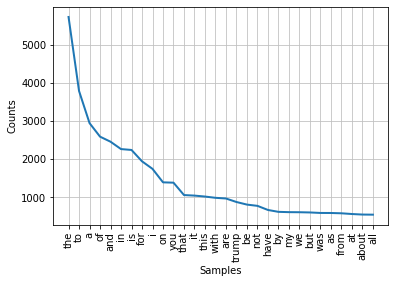

In [85]:
from matplotlib import pyplot as plt
fdist_tweet.plot(30)
plt.show()

In [86]:
top30 = list(fdist_tweet.most_common(30))
word30 = [t[0] for t in top30]
log30 = [np.log(t[1]) for t in top30]

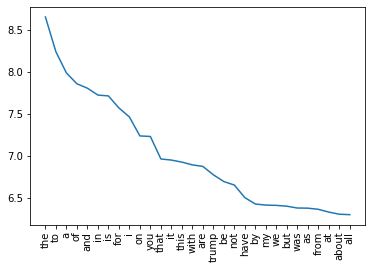

In [87]:
plt.plot(word30,log30)
plt.xticks(rotation=90)
plt.show()

In [88]:
from nltk import ngrams
n_grams = {}

for n in range(2,6):
    d_n = {}
    for t in tweets:
        grams = ngrams(t.split(), n)
        for g in grams:
            if g in d_n:
                d_n[g] = d_n[g]+1
            else:
                d_n[g] = 1
    n_grams[n] = d_n
        
    

In [89]:
n_grams_chars = {}
for n in range(2,8):
    d_char = {}
    for b in tweets:
        grams = [b[i:i+n] for i in range(len(b)-n+1)]
        for g in grams:
            if g in d_char:
                d_char[g] = d_char[g]+1
            else:
                d_char[g] = 1
        n_grams_chars[n] = d_char

In [90]:
n_grams_chars[2]

{'#A': 329,
 'Ar': 329,
 'ri': 5601,
 'ia': 3077,
 'an': 12396,
 'na': 2985,
 'aG': 37,
 'Gr': 425,
 'ra': 5000,
 'nd': 5810,
 'de': 4198,
 'e ': 24065,
 ' A': 2389,
 'i ': 1002,
 ' B': 1902,
 'By': 48,
 'y ': 8797,
 'a ': 5791,
 ' G': 1300,
 ' 8': 83,
 '80': 44,
 '0%': 42,
 '% ': 66,
 ' F': 1601,
 'Fu': 133,
 'ul': 1980,
 'll': 6009,
 'l ': 5589,
 ' #': 9340,
 '#S': 561,
 'Si': 196,
 'in': 16139,
 'ng': 7909,
 'ge': 2779,
 'er': 11324,
 'r ': 8099,
 'Ac': 141,
 'ct': 2002,
 'tr': 2446,
 're': 10749,
 'es': 8286,
 'ss': 2368,
 ' K': 545,
 'KI': 87,
 'II': 41,
 'IS': 533,
 'S ': 902,
 'FM': 16,
 'M ': 200,
 ' Y': 578,
 'Yo': 755,
 'ou': 6701,
 'ur': 2969,
 'rs': 2555,
 's ': 19412,
 ' T': 3614,
 'Tr': 2001,
 'ru': 2619,
 'ly': 2187,
 ' C': 2696,
 'CD': 9,
 'D ': 475,
 ' l': 3371,
 'li': 5082,
 'is': 7851,
 'st': 8216,
 'te': 7417,
 'en': 7306,
 'ni': 2701,
 'g ': 5914,
 ' p': 4265,
 'pa': 1382,
 'ar': 7970,
 'rt': 2335,
 'ty': 1382,
 ' i': 7349,
 'n ': 12542,
 'Bu': 296,
 'rb': 172,
 'b

In [93]:
dev = open('./data/Gold/dev.txt').readlines()
devtest = open('./data/Gold/devtest.txt').readlines()
test = open('./data/Gold/test.txt').readlines()
train = open('./data/Gold/train.txt').readlines()


In [103]:
def remove_http(tweet):
    t = tweet.split(' ')
    temp = []
    for s in t:
        if "https://"  in s or "http://" in s:
            continue
        else:
            temp.append(s)
    return " ".join(temp)

def read_tweets(f):
    positive = []
    negative = []
    neutral = []
    tweets = []
    for s in f:
        t = s.split('\t')
        t[2] = remove_http(t[2])
        if t[1] == "positive":
            positive.append(t[2])
        elif t[1] == "negative":
            negative.append(t[2])
        elif t[1] == "neutral":
            neutral.append(t[2])
        tweets.append(t[2])
    d = {}
    d["positive"] = positive
    d["negative"] = negative
    d["neutral"] = neutral
    return tweets,d

dev_tweets, dev_tweets_dict = read_tweets(dev)

In [104]:
dev_tweets, dev_tweets_dict = read_tweets(dev)
devtest_tweets, devtest_tweets_dict = read_tweets(devtest)
test_tweets, test_tweets_dict = read_tweets(test)
train_tweets, train_tweets_dict = read_tweets(dev)

In [105]:
dev_tweets_dict['positive']

['Jay Z joins Instagram with nostalgic tribute to Michael Jackson: Jay Z apparently joined Instagram on Saturday and..',
 'I liked a @YouTube video One Direction singing "Man in the Mirror" by Michael Jackson in Atlanta, GA [June 26,\n',
 "18th anniv of Princess Diana's death. I still want to believe she is living on a private island away from the public. With Michael Jackson.\n",
 '@oridaganjazz The 1st time I heard Michael Jackson sing was in Honolulu, Hawaii @ a restaurant on radio. It was A.B.C. I was 13. I loved it!\n',
 'Are you old enough to remember Michael Jackson attending the Grammys with Brooke Shields and Webster sat on his lap during the show?\n',
 '@MariahCarey may he R.I.P. Happy Birthday Michael Jackson . :)\n',
 "VIRGO OF THE DAY- We wished our fellow Virgo Captain Michael Jackson a Happy Birthday on the 29th now it's time...",
 'Michael Jackson was the man, I remember watching the Thriller &amp; Smooth Criminal music video for the 1st time &amp; it was lit\n',
 "ALDU

In [110]:
tokens_dev_tweets = {}
tokens_devtest_tweets = {}
tokens_test_tweets = {}
tokens_train_tweets = {}

def process_list_tweets(tweets):
    res = []
    for tweet in tweets:
        tokens = TweetTokenizer().tokenize(tweet)
        tokens =  list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
        tokens = [x.lower() for x in tokens]
        res.append(tokens)
    return res

tokens_dev_tweets['positive'] = process_list_tweets(dev_tweets_dict['positive'])
tokens_dev_tweets['negative'] = process_list_tweets(dev_tweets_dict['negative'])
tokens_dev_tweets['neutral'] = process_list_tweets(dev_tweets_dict['neutral'])

tokens_devtest_tweets['positive'] = process_list_tweets(devtest_tweets_dict['positive'])
tokens_devtest_tweets['negative'] = process_list_tweets(devtest_tweets_dict['negative'])
tokens_devtest_tweets['neutral'] = process_list_tweets(devtest_tweets_dict['neutral'])

tokens_test_tweets['positive'] = process_list_tweets(test_tweets_dict['positive'])
tokens_test_tweets['negative'] = process_list_tweets(test_tweets_dict['negative'])
tokens_test_tweets['neutral'] = process_list_tweets(test_tweets_dict['neutral'])

tokens_train_tweets['positive'] = process_list_tweets(train_tweets_dict['positive'])
tokens_train_tweets['negative'] = process_list_tweets(train_tweets_dict['negative'])
tokens_train_tweets['neutral'] = process_list_tweets(train_tweets_dict['neutral'])


In [126]:
tokens_gold_only = []
for att in tokens_dev_tweets:
    for tw in tokens_dev_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)
                

len(tokens_gold_only)

3071

In [127]:
for att in tokens_devtest_tweets:
    for tw in tokens_devtest_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)
                


In [128]:
for att in tokens_test_tweets:
    for tw in tokens_test_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)


In [129]:

for att in tokens_train_tweets:
    for tw in tokens_train_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)

In [130]:
len(tokens_gold_only)

26488

In [133]:
print("Training Positive: ", len(tokens_train_tweets['positive']))
print("Training Negative: ", len(tokens_train_tweets['negative']))
print("Training Neutral: ", len(tokens_train_tweets['neutral']))

Training Positive:  843
Training Negative:  391
Training Neutral:  765


In [137]:
positive_train = [item for sublist in tokens_train_tweets['positive'] for item in sublist]
freq_post_train = FreqDist(positive_train)

In [140]:
freq_post_train.most_common(30)

[('the', 712),
 ('to', 344),
 ('i', 271),
 ('on', 268),
 ('and', 237),
 ('a', 237),
 ('in', 218),
 ('is', 182),
 ('of', 181),
 ('you', 173),
 ('be', 160),
 ('with', 159),
 ('for', 159),
 ('may', 138),
 ('at', 129),
 ('tomorrow', 123),
 ('it', 118),
 ('my', 110),
 ('this', 90),
 ('that', 90),
 ('have', 86),
 ('minecraft', 80),
 ('just', 76),
 ('all', 75),
 ('will', 75),
 ("i'm", 69),
 ('was', 68),
 ('pride', 68),
 ('parade', 66),
 ('but', 65)]

In [141]:
negative_train = [item for sublist in tokens_train_tweets['negative'] for item in sublist]
freq_nega_train = FreqDist(negative_train)
freq_nega_train.most_common(30)

[('the', 332),
 ('to', 178),
 ('a', 125),
 ('of', 113),
 ('may', 109),
 ('and', 102),
 ('is', 101),
 ('i', 98),
 ('in', 95),
 ('on', 82),
 ('you', 74),
 ('be', 70),
 ('it', 67),
 ('for', 60),
 ('planned', 57),
 ('have', 55),
 ('that', 54),
 ('with', 54),
 ('parenthood', 53),
 ('sarah', 52),
 ('obama', 51),
 ('palin', 50),
 ('was', 48),
 ('rick', 44),
 ('this', 43),
 ('out', 41),
 ('perry', 41),
 ('1st', 40),
 ('as', 39),
 ('scotus', 39)]

In [143]:
neutral_train = [item for sublist in tokens_train_tweets['neutral'] for item in sublist]
freq_neut_train = FreqDist(neutral_train)
freq_neut_train.most_common(30)

[('the', 622),
 ('to', 340),
 ('a', 221),
 ('i', 219),
 ('on', 218),
 ('and', 193),
 ('in', 183),
 ('of', 174),
 ('it', 158),
 ('may', 150),
 ('is', 147),
 ('for', 147),
 ('be', 132),
 ('you', 125),
 ('that', 115),
 ('with', 114),
 ('at', 107),
 ('was', 84),
 ('tomorrow', 82),
 ('but', 79),
 ('obama', 78),
 ('have', 75),
 ('not', 75),
 ('will', 71),
 ('about', 61),
 ('1st', 61),
 ('just', 60),
 ('scotus', 59),
 ('time', 55),
 ('this', 53)]